# BTC autotrader history analysis

In [1]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [2]:
csv_file = '../btc-autotrader/lib/data/log/2019-03-06T08:33:30.701818.csv'

In [3]:
df = pd.read_csv(csv_file, names=('datetime', 'cash', 'btc_in_possession', 'btc_current_price', 'position', 'rate_of_change', 'total_value'))

In [4]:
df.datetime = pd.to_datetime(df.datetime)

In [5]:
conditions = [
    (df.position == 'None'),
    (df.position == 'POSSESSING'),
    (df.position == 'BIDDED'),
    (df.position == 'ASKED')
]
choices = [0, 3, 2, 1]
df['position_int'] = np.select(conditions, choices, default=0)

In [6]:
df.tail()

,datetime,cash,btc_in_possession,btc_current_price,position,rate_of_change,total_value,position_int
1592,2019-03-06 10:56:36.935925,95654.0,0.007073,427550.0,None,-0.120529,98678.274925,0
1593,2019-03-06 10:56:42.125945,95654.0,0.007073,427550.0,None,-0.120529,98678.274925,0
1594,2019-03-06 10:56:47.323374,95654.0,0.007073,427514.0,None,-0.090918,98678.020279,0
1595,2019-03-06 10:56:52.520638,95654.0,0.007073,427514.0,None,-0.083531,98678.020279,0
1596,2019-03-06 10:56:58.509146,95654.0,0.007073,427514.0,None,-0.083531,98678.020279,0


/Users/soichi/.pyenv/versions/3.7.1/envs/finance-stats/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


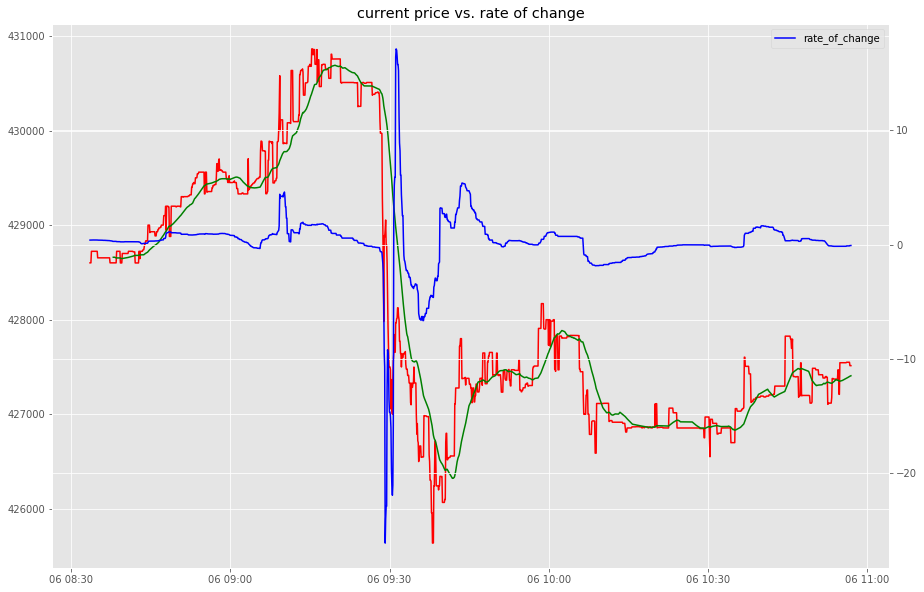

In [7]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='g')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.title("current price vs. rate of change")
plt.legend()
plt.show()

## サイトの画面から判断した、累積日次損益が上がっている部分だけを取り出す

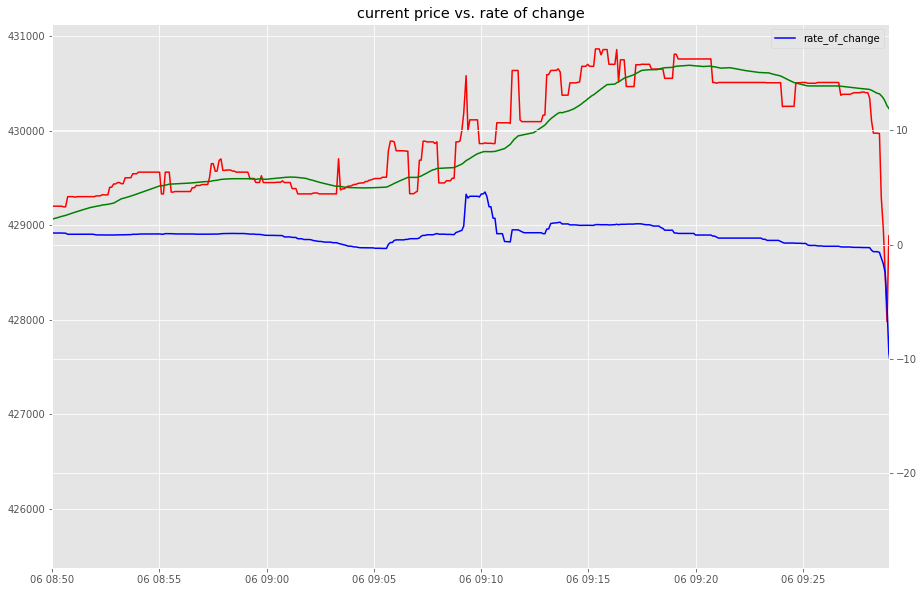

In [8]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='g')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.title("current price vs. rate of change")
plt.legend()
x_min = datetime.datetime(2019, 3, 6, 8, 50)
x_max = datetime.datetime(2019, 3, 6, 9, 29)
plt.xlim(x_min, x_max)
plt.show()

## 逆に、利益が上がっていない部分

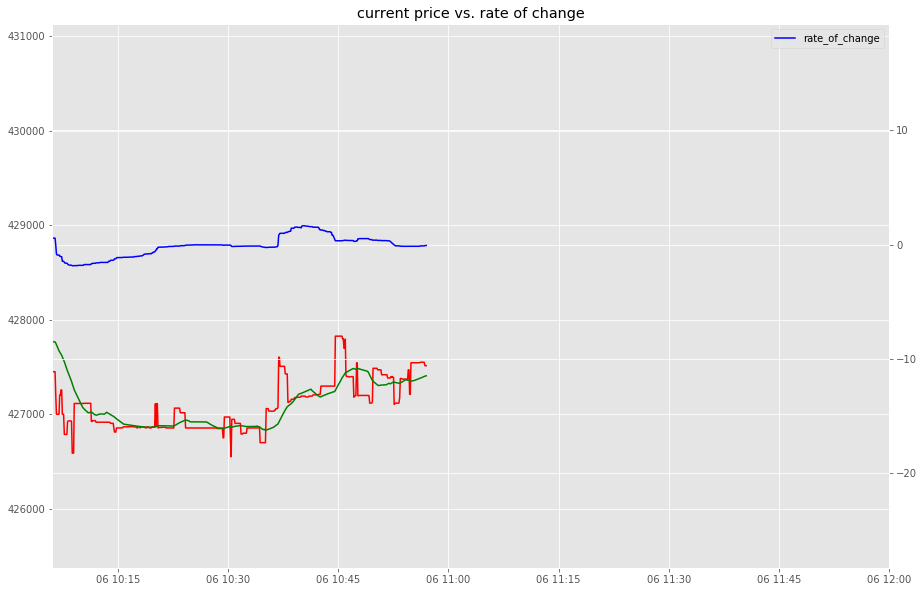

In [9]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='g')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.title("current price vs. rate of change")
plt.legend()
x_min = datetime.datetime(2019, 3, 6, 10, 6)
x_max = datetime.datetime(2019, 3, 6, 12, 0)
plt.xlim(x_min, x_max)
plt.show()

## current price の％変化

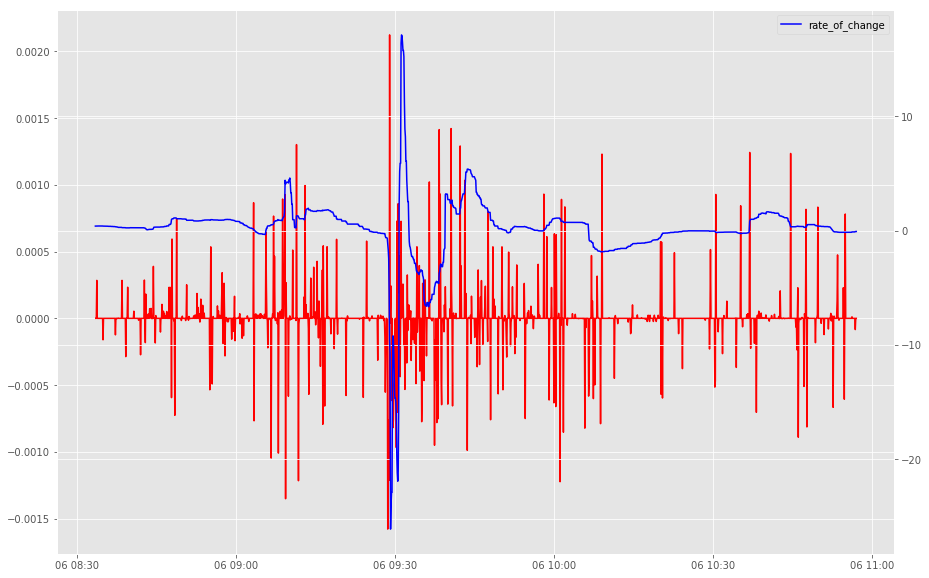

In [10]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price.pct_change(), color='r', label='percent change')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

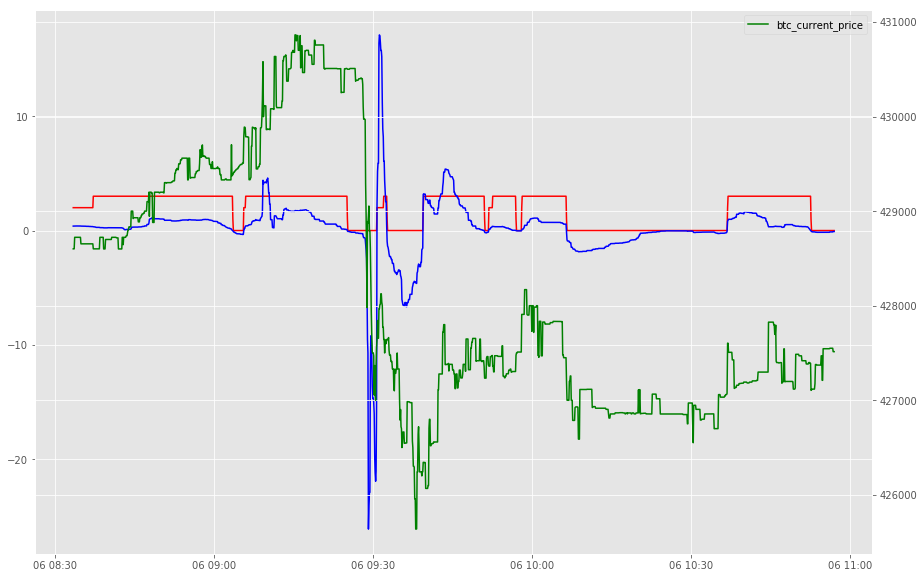

In [11]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.position_int, color='r')
ax2.plot(df.datetime, df.btc_current_price, color='g')
ax1.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

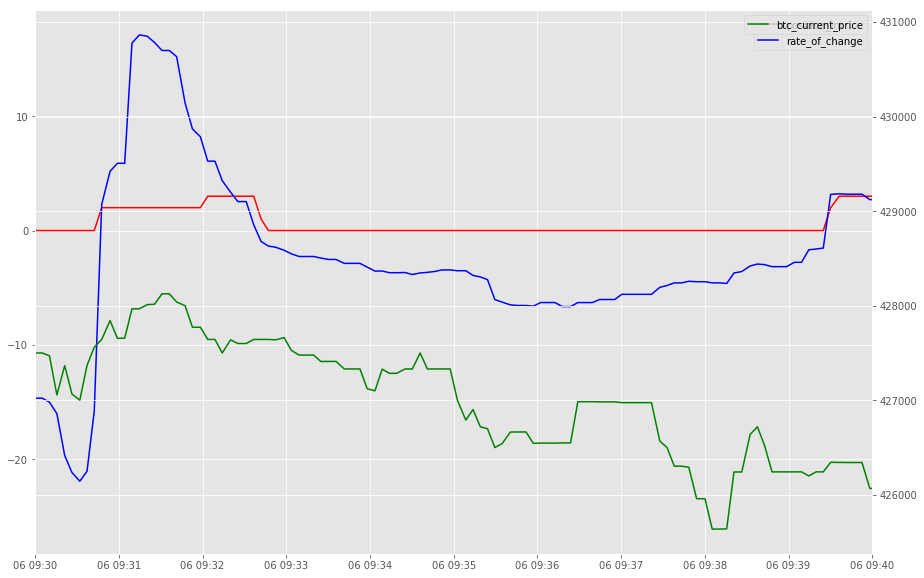

In [12]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.position_int, color='r')
ax2.plot(df.datetime, df.btc_current_price, color='g')
ax1.plot(df.datetime, df.rate_of_change, color='b')
ax1.legend()
ax2.legend()
x_min = datetime.datetime(2019, 3, 6, 9, 30)
x_max = datetime.datetime(2019, 3, 6, 9, 40)
plt.xlim(x_min, x_max)
plt.show()

In [13]:
# 9:30 からの rate_of_change→急激に上昇している
dt = datetime.datetime(2019, 3, 6, 9, 30)
df[df.datetime > dt]

,datetime,cash,btc_in_possession,btc_current_price,position,rate_of_change,total_value,position_int
630,2019-03-06 09:30:05.045034,95658.0,0.007203,427500.0,None,-14.656436,98737.496250,0
631,2019-03-06 09:30:10.234704,95658.0,0.007203,427470.0,None,-15.013648,98737.280145,0
632,2019-03-06 09:30:15.544269,95658.0,0.007203,427056.0,None,-16.009086,98734.297896,0
633,2019-03-06 09:30:21.151888,95658.0,0.007203,427367.0,None,-19.670422,98736.538185,0
634,2019-03-06 09:30:26.349302,95658.0,0.007203,427066.0,None,-21.159968,98734.369931,0
635,2019-03-06 09:30:31.965149,95658.0,0.007203,427001.0,None,-21.917412,98733.901703,0
636,2019-03-06 09:30:37.142974,95658.0,0.007203,427368.0,None,-21.047889,98736.545388,0
637,2019-03-06 09:30:42.332321,95658.0,0.007203,427561.0,None,-15.802972,98737.935664,0
638,2019-03-06 09:30:47.682059,95658.0,0.007203,427643.0,BIDDED,2.275382,98738.526351,2
639,2019-03-06 09:30:53.658433,95658.0,0.007203,427843.0,BIDDED,5.179074,98739.967050,2


## total_value, cash, current_priceの変化

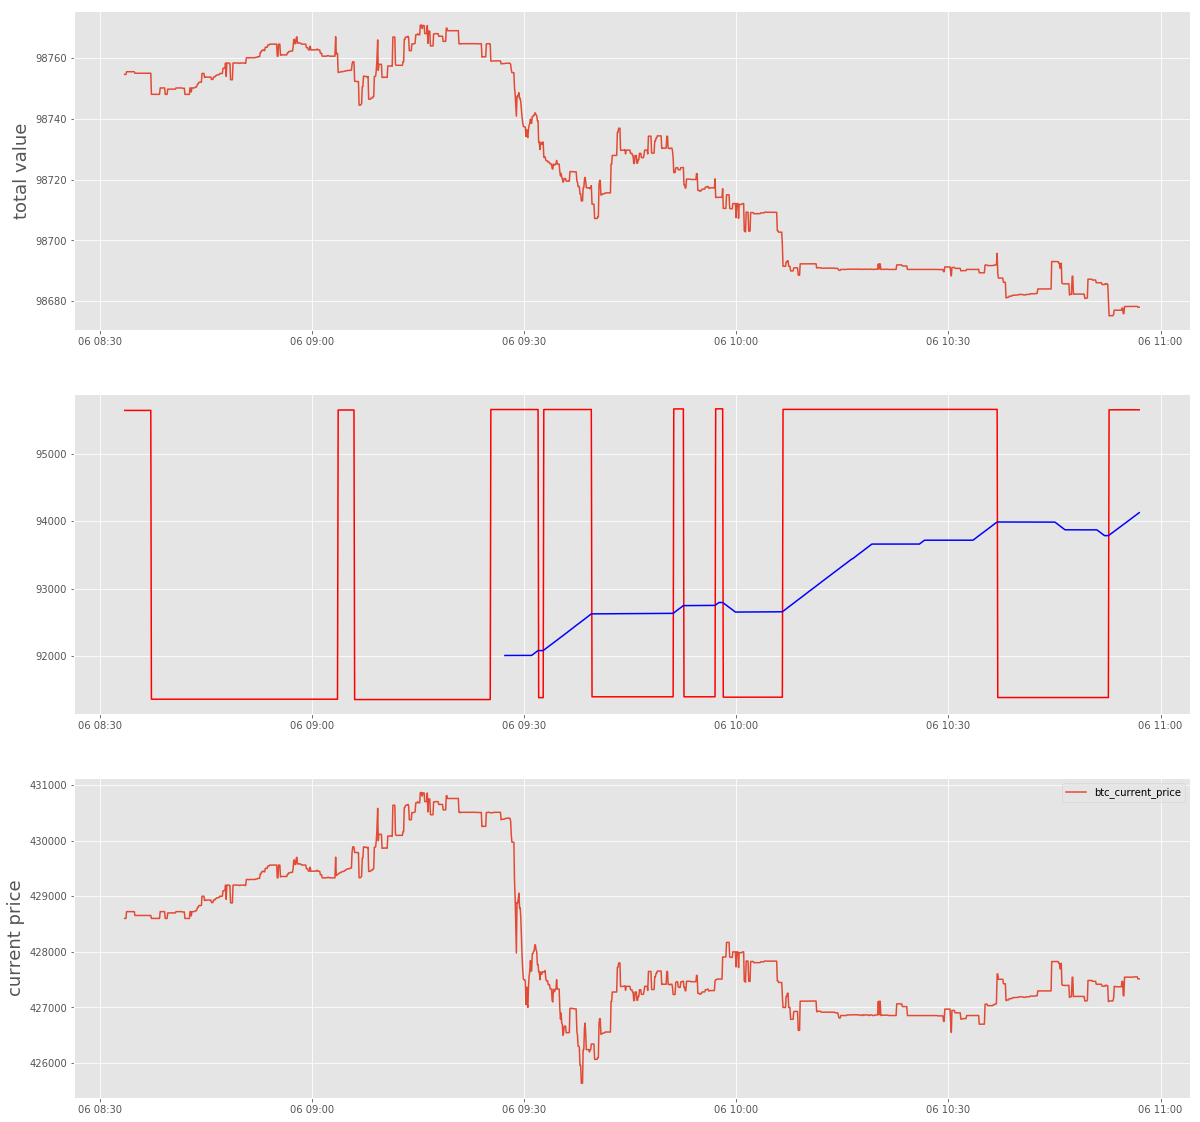

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.subplot(3,1,1)
plt.plot(df.datetime, df.total_value)
#plt.ylim(83000,83500)
plt.ylabel('total value', fontsize=18)
plt.subplot(3,1,2)
plt.plot(df.datetime, df.cash, color='r')
plt.plot(df.datetime, df.cash.rolling(600).mean(), color='b')
plt.subplot(3,1,3)
plt.plot(df.datetime, df.btc_current_price)
plt.ylabel('current price', fontsize=18)
plt.legend()
plt.show()

## btc_current_priceのlogarithmic returns

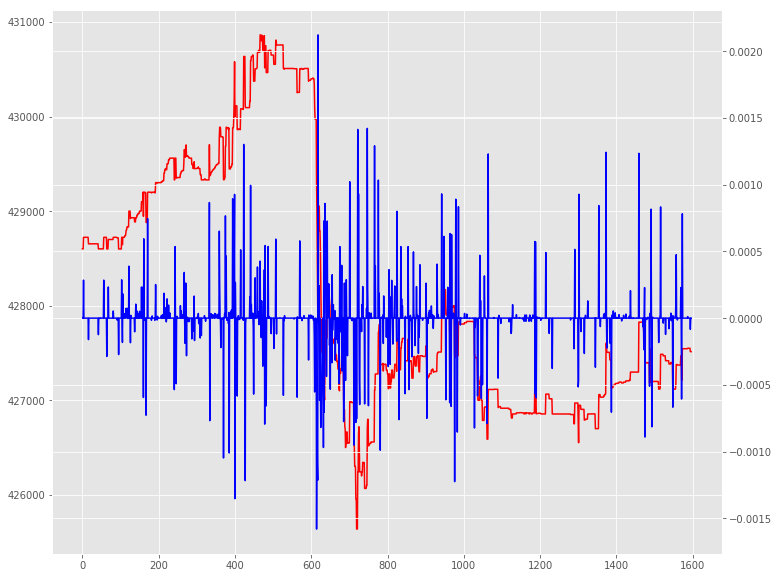

In [15]:
returns = np.log(df.btc_current_price / df.btc_current_price.shift(1))
fig, ax1 = plt.subplots(figsize=(12, 10))
ax2 = ax1.twinx()
ax1.plot(df.btc_current_price, color='r')
ax2.plot(returns, color='b')
plt.show()

## 手数料を無視したトレード結果分析

position_int: 
None->0,
ASKED->1,
BIDDED->2,
POSSESSING->3

In [16]:
df_bidded = df.loc[df.position == 'BIDDED']
df_asked = df.loc[df.position == 'ASKED']

In [17]:
df_bidded.reset_index()
df_asked.reset_index()

# TODO この計算の仕方はダメ! DataFrameのelement wiseで計算できるはずなんだが…
result = []
for index in range(len(df_asked)):
    result.append(df_asked.btc_current_price.iloc[index] - df_bidded.btc_current_price.iloc[index])

profit = sum(result) * 0.001

print("profit should be {}".format(profit))

profit should be -4.151


ValueError: x and y must be the same size

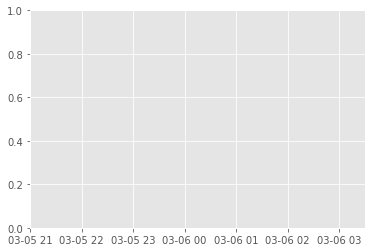

In [18]:
x_min = datetime.datetime(2019, 3, 5, 21, 0)
x_max = datetime.datetime(2019, 3, 6, 3, 30)
plt.xlim(x_min, x_max)
plt.scatter(df_bidded.datetime, pd.DataFrame(result))

In [ ]:
x_min = datetime.datetime(2019, 3, 5, 21, 0)
x_max = datetime.datetime(2019, 3, 6, 3, 30)
plt.figure(figsize=(12, 10))
plt.scatter(df_bidded.datetime, df_bidded.btc_current_price, color='r')
plt.scatter(df_asked.datetime, df_asked.btc_current_price, color='b')
plt.xlim(x_min, x_max)
plt.show()

## 手数料計算
各取引時のbtc_current_price で 0.000013 btc をかけ、合計を出す

https://bitflyer.com/ja-jp/commission#bitcoin-fees

In [ ]:
#約定のタイミングをdfから割り出す必要がある
df_trade_executed 
btc_fee = 0.000013
btc_current_price
total_fee = num_trade * btc_fee

## calculate and plot acceleration

In [ ]:
df.dtypes

In [35]:
start_datetime = df.datetime.iloc[0]
df['acceleration'] = (df.rate_of_change - df.rate_of_change.shift(1)) / (df.datetime- df.datetime.shift(1)).dt.total_seconds()
df.head()

,datetime,cash,btc_in_possession,btc_current_price,position,rate_of_change,total_value,position_int,time_elapsed,acceleration,acceleration2
0,2019-03-06 08:33:31.502421,95645.0,0.007256,428601.0,BIDDED,0.388295,98754.714555,2,0.000000,NaN,NaN
1,2019-03-06 08:33:36.761304,95645.0,0.007256,428601.0,BIDDED,0.388295,98754.714555,2,5.258883,0.000000,0.000000
2,2019-03-06 08:33:42.006705,95645.0,0.007256,428601.0,BIDDED,0.388295,98754.714555,2,10.504284,0.000000,0.000000
3,2019-03-06 08:33:47.640526,95645.0,0.007256,428723.0,BIDDED,0.396954,98755.599727,2,16.138105,0.001537,0.001537
4,2019-03-06 08:33:52.861926,95645.0,0.007256,428723.0,BIDDED,0.397903,98755.599727,2,21.359505,0.000182,0.000182


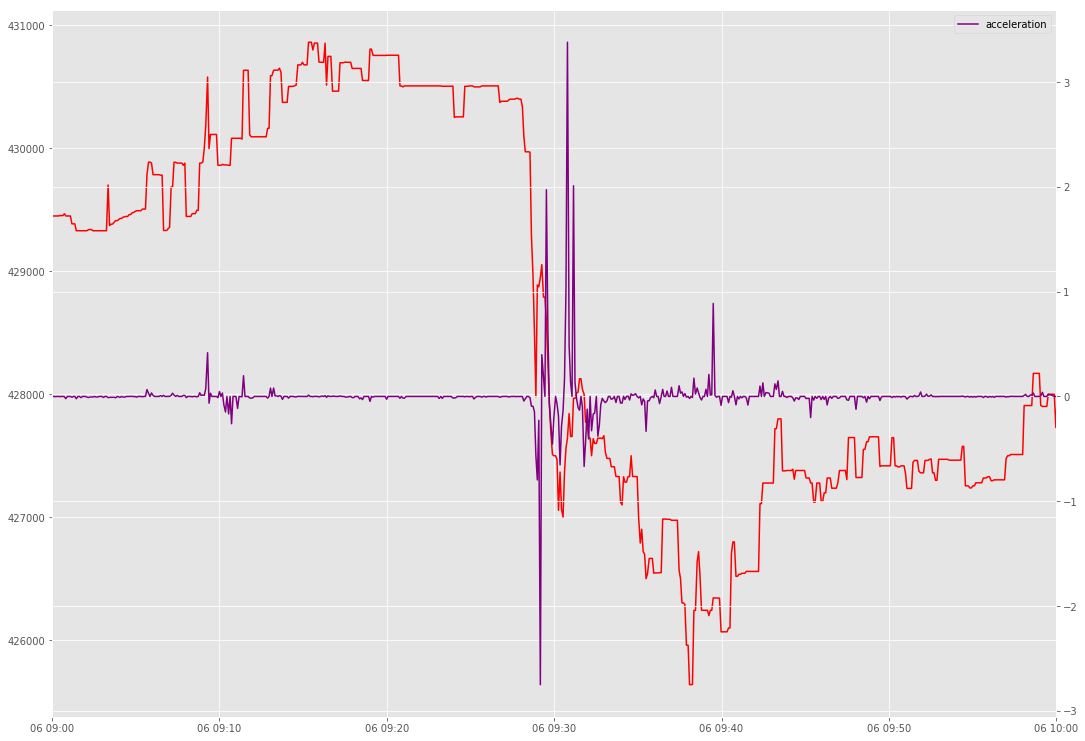

In [36]:
fig, ax1 = plt.subplots(figsize=(18,13))
ax2 = ax1.twinx()
x_min = datetime.datetime(2019, 3, 6, 9, 0)
x_max = datetime.datetime(2019, 3, 6, 10, 0)
plt.xlim(x_min, x_max)
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r', label='current price')
#ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='green', label='moving average price')
#ax2.plot(df.datetime, df.rate_of_change, color='b', label='rate of change')
ax2.plot(df.datetime, df.acceleration, color='purple', label='acceleration')
plt.legend()
plt.show()

## 正規化してcurrent price との相関関係を調べる

## 加速度のしきい値を上回る/下回る場合は、急激な上昇/下降